# 更进一步，运用我们的大数据知识，做一个电影推荐系统！

## 推荐系统是否有必要？

数据收集的快速增长开创了信息的新时代。 数据被用来创建更有效的系统，这就是推荐系统发挥作用的地方。 推荐系统是一种信息过滤系统，因为它们可以提高搜索结果的质量，并提供与搜索项更为相关或与用户的搜索历史相对应的选项。它们用于预测用户对某项商品的评价或偏好。 几乎每家大型科技公司都以某种形式应用了它们：亚马逊使用它向客户推荐产品，YouTube使用它来决定自动播放下一个要播放的视频，Facebook使用它来推荐喜欢的页面和关注的人 。此外，像Netflix和Spotify这样的公司在很大程度上依赖其推荐引擎对其业务和业务来源的作用。

[![Y20cIs.jpg](https://s1.ax1x.com/2020/05/17/Y20cIs.jpg)](https://imgchr.com/i/Y20cIs)


我们将使用[TMDB 5000电影数据集](http://https://www.kaggle.com/tmdb/tmdb-movie-metadata)构建基础电影推荐系统，该推荐系统由以下三种类型组成：



1）受众特征过滤：根据电影的受欢迎程度，它们向每个用户提供通用推荐。系统通过统计向具有相似特征的用户推荐相同的电影。由于每个用户都不相同，因此该方法被认为过于简单。该系统背后的基本思想是，更受大众欢迎和好评的电影具有更高的被普通观众喜欢的可能性。


2）基于内容的推荐：根据特定物品推荐相似的物品。该系统使用物品元数据（例如电影的流派，导演，描述，演员等）来提出这些推荐建议。这些推荐系统背后的总体思想是，如果某人喜欢某个特定物品，那么他（她）也将喜欢与之相似的物品。


3）协同过滤：该系统找到具有相似兴趣的人或者相似度接近的物品，并根据计算结果提供推荐建议。

In [34]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('./tmdb_5000_credits.csv')
df2=pd.read_csv('./tmdb_5000_movies.csv')

tmdb_5000_movies.csv 中共有 20 个字段，其各自释义如下：

budget：预算
genres：分类
homepage：主页（大量缺失值，但不重要）
id：编号
keywords：关键词标签
original_language：原语言
original_title：原标题
overview：简介
popularity：流行度
production_companies：制作公司
production_countries：制作国家
release_date：上映日期
revenue：收益
runtime：时长
spoken_languages：配音语言
status：状态
tagline：一句话标语
title：题目
vote_average：平均分
vote_count：参与评分人数
tmdb_5000_credits.csv 中共有4 个字段，其各自释义如下：

movie_id：编号
title：电影名称
cast：演员阵容
crew：全体人员

In [4]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [5]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 二、特征过滤
  首先我们需要如下准备：
* 我们需要一个指标来给电影评分
* 计算每部电影的分数
* 按照得分排序并向用户推荐得分最高的电影

我们可以将电影的平均评分作为得分，但使用它的评分不够合理，如果电影的平均评分为8.9，但是只有3个人评分，得分评价不应该比40人评分得分为7.8的高

## 这里我们采用的是根据IMDB网站上公布的TOP250评分标准：

   公式如下：

　　$weighted rank (WR) = (\frac{v} {v+m}) R + (\frac{m} {v+m})  C$

　　其中：

　　R = average for the movie (mean) = (Rating) （是用普通的方法计算出的平均分）

　　v = number of votes for the movie = (votes) （投票人数，需要注意的是，只有经常投票者才会被计算在内，这个下面详细解释）

　　m = minimum votes required to be listed in the top 250 (currently 1250) （进入imdb top 250需要的最小票数，只有三两个人投票的电影就算得满分也没用的）

　　C = the mean vote across the whole report (currently 6.9) （目前所有电影的平均得分）

　　仔细研究这个公式，你会发现，IMDB为每部电影增加了1250张选票，并且这些选票的评分都为6.9。这样做的原因是，假设所有电影都至少有1250张选票，那么就都具备了进入前250名的评选条件；然后假设这1250张选票的评分是所有电影的平均得分（即假设这部电影具有平均水准）；最后，用现有的观众投票进行修正，长期来看，v/(v+m)这部分的权重将越来越大，得分将慢慢接近真实情况。

　　这样做拉近了不同电影之间投票人数的差异，使得投票人数较少的电影也有可能排名前列。

　　IMDB上的评分完全来自于网民的评价，凭的是参与评价的网民的自身喜好，参与评分的网民越多，IMDB的评分越有可靠性。

In [6]:
C= df2['vote_average'].mean()
C

6.092171559442016

因此，所有电影的平均评分在10的等级上约为6。下一步是确定m的适当值，即数据表中需要列出的最低票数。 我们将使用前90%作为截止点。 换句话说，要使电影在数据表中出现，其评分人数必须超过列表中至少90％的电影。

In [7]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

筛选出符合条件的电影

In [8]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

我们看到有481部电影符合条件。现在，我们需要计算每个合格电影的分数。为此，我们将定义一个函数weighted_rating（），并增加一个新特征score

In [9]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [10]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

最后，让我们计算电影分数并且排序，并输出标题，评分人数，平均分和加权后前10名电影的得分。

In [11]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


成功了！我们完成了一个基本的推荐系统
在这些系统的“现在趋势”标签下，我们找到了非常受欢迎的电影，可以通过按“受欢迎度”列对数据集进行排序来获得电影。

Text(0.5, 1.0, 'Popular Movies')

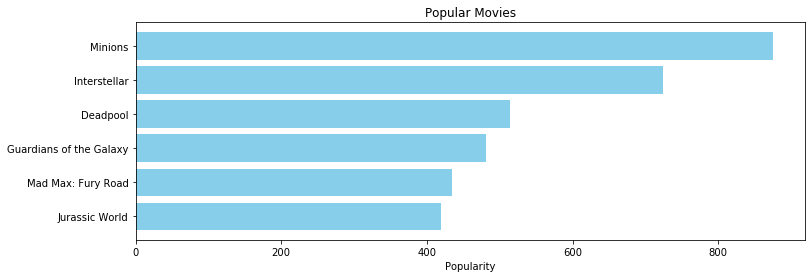

In [12]:
pop= df2.sort_values('popularity', ascending=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# 三、基于内容的推荐
在此推荐系统中，电影的内容（概述，演员，工作人员，关键字，标语等）用于计算其与其他电影的相似性。 然后，推荐最可能相似的电影。

![](https://image.ibb.co/f6mDXU/conten.png)
我们将根据所有电影的情节描述计算成对相似度得分，并根据相似度得分推荐电影。

In [13]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

我们需要转换每个描述的词向量。现在，我们将为每个句描述计算（TF-IDF）向量。
第一步，计算词频。


![Image Name](http://www.ruanyifeng.com/blogimg/asset/201303/bg2013031504.png)


第二步，计算逆文档频率。
这时，需要一个语料库（corpus），用来模拟语言的使用环境。

![Image Name](http://www.ruanyifeng.com/blogimg/asset/201303/bg2013031506.png)
第三步，计算TF-IDF。

![Image Name](http://www.ruanyifeng.com/blogimg/asset/201303/bg2013031507.png)


scikit-learn提供了一个内置的TfIdfVectorizer类，该类以两行代码生成TF-IDF矩阵。

In [15]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

我们看到数据集中使用了20,000多个不同的词来描述4800部电影。

有了这个矩阵，我们现在可以计算一个相似度得分。有几个相似度计算方法，例如欧几里得，皮尔逊和余弦相似度计算。

我们将使用余弦相似度来计算表示两个电影之间相似度的数值。 我们使用余弦相似度评分，因为它与幅度无关，并且相对容易且快速地进行计算。 在数学上，它的定义如下：
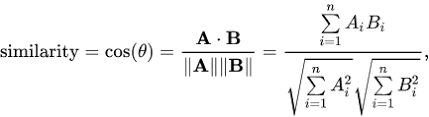

由于我们使用了TF-IDF矢量化器，因此计算点积将直接为我们提供余弦相似度评分。 因此，我们将使用sklearn的 linear_kernel（）代替cosine_similarities（），因为它速度更快。

In [35]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

我们将定义一个函数，该函数以电影标题作为输入并输出10个最相似电影的列表。 

In [17]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

现在，我们可以很好地定义推荐功能。遵循以下步骤：
* 根据标题获得电影的索引。
* 获取该特定电影与所有电影的余弦相似度得分列表。 将其转换为元组列表，其中第一个元素是其位置，第二个元素是相似性分数。
* 根据相似度分数对上述元组列表进行排序。
* 获取此列表的前10个元素。忽略第一个元素（与特定电影最相似的电影是电影本身）。
* 返回与顶部元素索引相对应的电影标题。


In [18]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [19]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [20]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

虽然我们的算法在推荐具有类似情节描述的电影方面做得不错，但是推荐的质量却不是那么好。 “黑暗骑士崛起”将重现所有蝙蝠侠电影，而喜欢该电影的人们更有可能更喜欢克里斯托弗·诺兰的其他电影。这是本算法无法发现的信息。

##  基于荣誉，电影类型和关键字的推荐
显然，使用更好的元数据将提高我们推荐程序的质量。这正是我们在本节中要做的。我们将基于以下元数据构建推荐系统：3个顶级演员，导演，相关流派和电影情节关键字。从演员，剧组和关键字中，我们需要提取三个最重要的演员，导演和与该电影相关的关键字。 

In [21]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

接下来，我们将编写函数以帮助我们提取所需的信息。

In [22]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [23]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [24]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [25]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


下一步是将名称和关键字实例转换为小写并去除它们之间的所有空格。 这样做是为了使我们的矢量化程序不会将“ Johnny Depp”和“ Johnny Galecki”中的Johnny视为相同变量。

In [26]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [27]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [28]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

后续步骤与我们对基于内容的推荐算法所做的相同。 一个重要的区别是我们使用CountVectorizer（）而不是TF-IDF。 这是因为我们不希望减轻演员/导演在相对较多的电影中所扮演或导演的影响力。 

In [29]:

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])



In [30]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [31]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [32]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [33]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

我们看到，由于更多的元数据，我们的推荐人已成功捕获了更多信息，并为我们提供了（可能是）更好的推荐。 漫威漫画或DC漫画迷更可能会喜欢同一家制作所的电影。 